## Students Performance in Exams

**About the Dataset:**

**Context:**
Marks secured by the students in different exmainations.

**Content:**
This dataset consists secured marks by 1000 students in 3 different examinations.

**Acknowledgement:**
http://roycekimmons.com/tools/generated_data/exams

**Inspiration:**
To understand the influence of the parents background, test preparation etc on students performance.

## My objectives :

* Check the dataset and tidying the data if needed.
* Visualize the data to understand the effects of different factors on a student performance.
* Check the effectiveness of test preparation course.
* Check what are the major factors influencing the test scores.

## Import the required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Let us read the data from the .csv file

In [2]:
df = pd.read_csv("../input/StudentsPerformance.csv")

## Printing the first few rows of the DataFrame 'df' to understant the various data columns

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the DataFrame

In [4]:
df.shape

(1000, 8)

## Let's check for the missing values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**It is clear from above that the DataFrame haven't any missing(null) values. We don't need to worry about the null values.
**

## Let's understand about the basic measures like minimum, maximum, mean, median, mode, standard deviation etc. of the numerical columns(consists scores in diff. exams) of the DataFrame

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Let's add two columns "Total marks" & "Percentage" 

* Total marks (for a student) = sum of the marks/scores in the 3 examinaion for a particular student.
* Percentage marks (for a student) = Total obtained marks divided by total marks, multiplied by 100.

In [7]:
df["Total marks"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = df["Total marks"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Let assign grades to the marks ##

### Grading System:

##### Above 90 -> A
##### 80 to  89 -> B
##### 70 to 79 -> C
##### 60 to 69 -> D
##### 50 to 59 -> E
##### less than 50   -> F ( means Fail)

##### Considering 50 as pass marks

In [8]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
df["Grade_math"] = df["math score"].apply(lambda s: Grade(s))
df["Grade_reading"] = df["reading score"].apply(lambda s: Grade(s))
df["Grade_writing"] = df["writing score"].apply(lambda s: Grade(s))
df["Overall_grade"] = df["Percentage"].apply(lambda s: Grade(s))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,D,A,B,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F,E,F,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C,C,C,C


## Let's start visualizing the data

## First we explore the scores of the examinations :

### Maths Score:

**Let's have a look to the marks distribution using a countplot from seaborn package.**

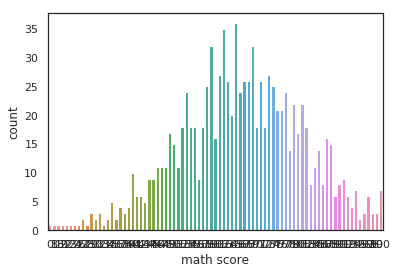

In [9]:
sns.set(style = "white")
sns.countplot(x = "math score", data = df)

**Now, we check how the students performed in this examination.**

In [10]:
df.Grade_math.value_counts()

D    268
C    216
E    188
F    135
B    135
A     58
Name: Grade_math, dtype: int64

**135 students among 1000 students failed in this examination.**

**Let's check the distribution of the grades using a countplot.**

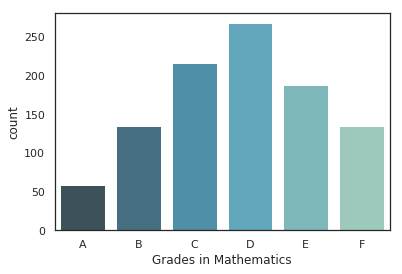

In [11]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Mathematics")

### Reading Score:

**Let's have a look to the marks distribution using a countplot from seaborn package.**

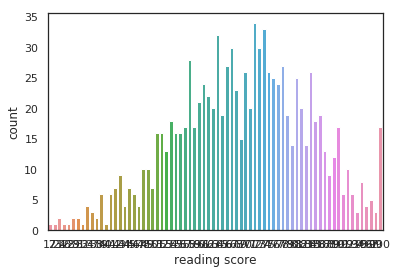

In [12]:
sns.countplot(x = "reading score", data = df)

**Now, we check how the students performed in this examination.**

In [13]:
df.Grade_reading.value_counts()

C    264
D    233
B    170
E    164
F     90
A     79
Name: Grade_reading, dtype: int64

**90 students among 1000 students failed in this examination.**

**Let's check the distribution of the grades using a countplot.**

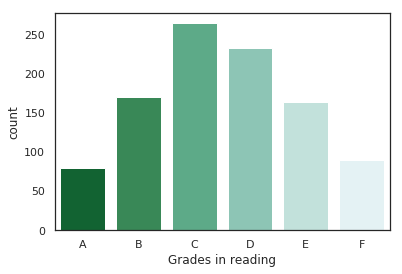

In [14]:
sns.countplot(x= "Grade_reading",data = df, order = order_grade, palette = "BuGn_r")
_ = plt.xlabel("Grades in reading")

### Writing Score:

**Let's have a look to the marks distribution using a countplot from seaborn package.**

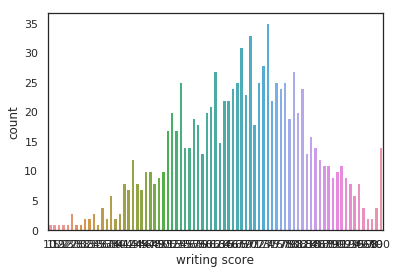

In [15]:
sns.countplot(x = "writing score", data = df)

**Now, we check how the students performed in this examination.**

In [16]:
df.Grade_writing.value_counts()

C    254
D    230
E    167
B    157
F    114
A     78
Name: Grade_writing, dtype: int64

**114 students among 1000 students failed in this examination.**

**Let's check the distribution of the grades using a countplot.**

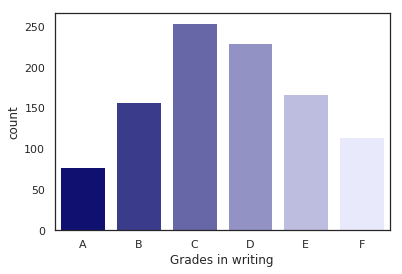

In [17]:
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = sns.light_palette("navy", reverse=True))
_ = plt.xlabel("Grades in writing")

## Overall score


**Now, we check the overall performance of the students in all the 3 examinations**

In [18]:
df.Overall_grade.value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: Overall_grade, dtype: int64

**It's clear from above 103 students among 1000 student failed in this examinations(overall)**

**Let's check the distribution of the overall grades using a countplot.**

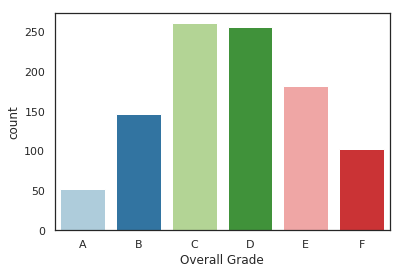

In [19]:
sns.countplot(x = 'Overall_grade', order = order_grade, data = df, palette = 'Paired')
_ = plt.xlabel("Overall Grade")

### Now, let's have a look how reading score and writing score are related to each other

**Let us create scatter plots to examine the scores**


**Scatter plot reading score vs writing score :**

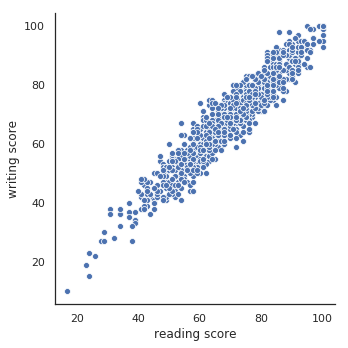

In [20]:
sns.relplot(x='reading score', y = 'writing score', data = df)

**Scatter plot writing score vs reading score:**

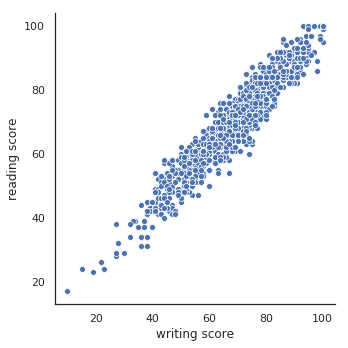

In [21]:
sns.relplot(x='writing score', y = 'reading score', data = df)

**From the graph it is quite clear that the reading score and writing score are linearly related. Let's find the linear correlation coefficient between the scores using numpy package**

In [22]:
r = np.corrcoef(df["reading score"], df["writing score"])[0, 1]
print(r)

0.9545980771462476


**As we know pearson's linear correlation coefficient lies between -1 to 1. Here the value of the coefficient is 0.95(approx) is near to value 1. So, we conclude that reading score and writing score linearly related**

## Now, we visualize the data to understand the influence of different factors on students performance 

### Race / Ethnicity:

**First we check the no of students from differnt group of  ethnicity**

In [23]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

**Let's check the distribution of the overall percentage marks over the groups using Boxplot**

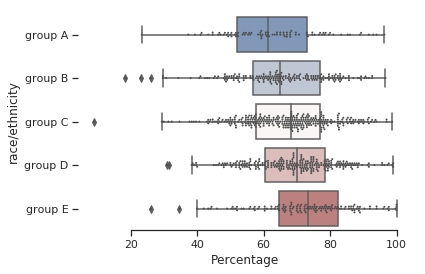

In [24]:
sns.set(style = "ticks")
order_race = ["group A","group B", "group C", "group D", "group E"]
sns.boxplot(x = "Percentage", y = "race/ethnicity", data = df, palette = "vlag", order = order_race)
sns.swarmplot(x = "Percentage", y = "race/ethnicity", data = df, size = 2, color = ".3", linewidth = 0, order = order_race)
sns.despine(trim = True, left = True)

**Let's compare the performances of students of different ethnicity using Violin plot**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


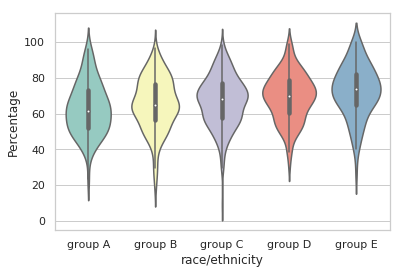

In [25]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'race/ethnicity', y = 'Percentage', data = df, palette = "Set3", order = order_race)

**From the above graph we can say that the students of group D are scored very well among the ethnicity groups**

### Lunch:


**First we check the no of students of different lunch category**

In [26]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

**Let's compare the performances of students of different lunch category using Boxen plot**

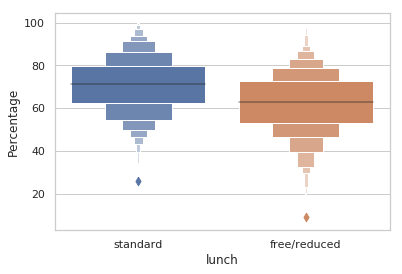

In [27]:
sns.boxenplot(x="lunch", y="Percentage", data=df)

**From the above graph we can conclude that students with standard lunch scored better than the others**

**Now we check the overall grade distribution of students of different lunch category using countplot**

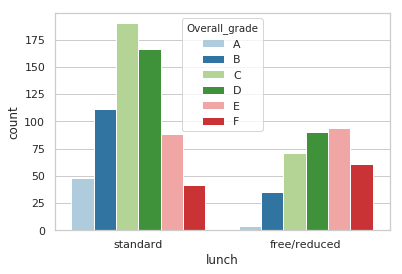

In [28]:
sns.countplot(x = "lunch", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")


### Test preparation course:

**Like before let's start with checking the no. of students who completed their preparation course and who aren't**

In [29]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

**Let's compare the performances of students using Boxen plot**

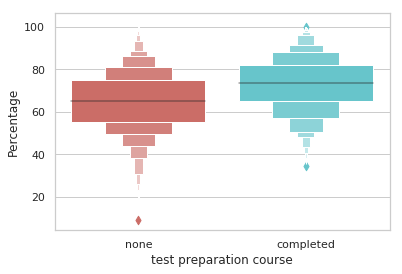

In [30]:
sns.boxenplot(x='test preparation course', y='Percentage',data = df, palette = "hls")

**From the above graph we can say that, students who had completed their test preparation course scored better than the others **

**Now we check the overall grade distribution of students**

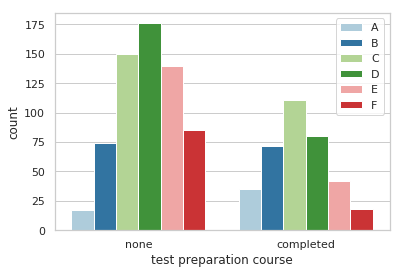

In [31]:
sns.countplot(x = "test preparation course", hue = "Overall_grade",data = df, hue_order = order_grade, palette = 'Paired')
_ = plt.legend()

### Parental level of education:

**First we start with checking no. students with different parental level of education **

In [32]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

**Now check the distribution of grades over different parental level of education using count plot**

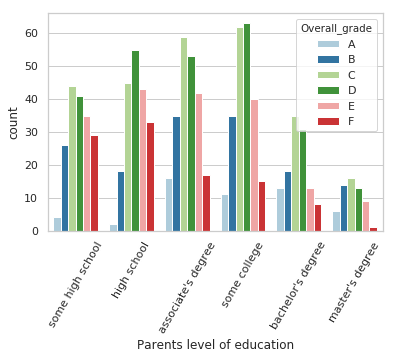

In [33]:
order_edu = ['some high school','high school',"associate's degree","some college","bachelor's degree","master's degree"]
p = sns.countplot(x='parental level of education', hue='Overall_grade',data=df, order= order_edu, hue_order = order_grade, palette = 'Paired')
_ = plt.xlabel('Parents level of education')
_ = plt.setp(p.get_xticklabels(), rotation = 60)

**Last we check how the students od different parental level of education performed in the exam, using Violin plot **

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


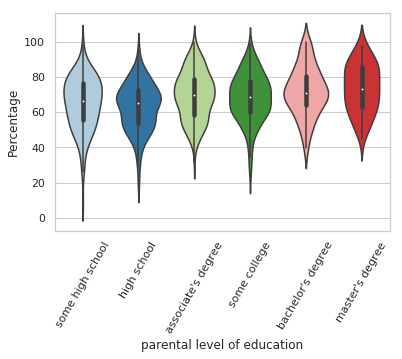

In [34]:
q = sns.violinplot(x="parental level of education", y="Percentage", data = df, order = order_edu,palette = "Paired")
_ = plt.setp(q.get_xticklabels(), rotation = 60)

**So, from the above graph we can conclude that the student's whose parents have master's degree performed better than others**

## Conclusion

**We've already saw the insights of the Data.                                                                                                                                         
Here is a little summary of all code which have written above:**
* 135 students failed in mathematics, 90 students failed in reading examination, 114 students failed in writing examination and overall 103 students failed the examination.
* Among all the students we saw that no. of student with grade "C" and "D" is very high. 
* Reading score and Writing score are positively linearly correlated with correlation coefficient 0.95(approx.).
* Students who belongs to group D in ethnicity performed very well.
* Test Preparation Course is very effective. We saw that the students who had completed their test preparation course failed less in number.
* Students who takes standard lunch performed very well than others.
* In case of parental education level if we look at the count plot and observe the red bar (which indicating the no. of students who got grade "F") we can see the effect of parents education level.